# Лабораторная работа №3: Регрессионный анализ
Выполнил студент гр. 1375 Меньшиков Валерий. Вариант №16

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

1. **Линейная регрессионная модель**
   - Уравнение регрессии: $y = \beta_0 + \beta_1x_1 + ⋯ + \beta_nx_n + \epsilon $.
<br><br>
2. **МНК (Метод Наименьших Квадратов)**
   - Минимизация  $RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\| $.
   - Решение через нормальные уравнения:  $XX^{\intercal}\beta=XY $.
   - Несмещенная оценка дисперсии  $S^{2} = \frac{RSS(\widehat{\beta})}{n-r} $.
<br><br>
3. **Доверительный интервал**
   - ДНО функции:  $\psi=с^{\intercal}\beta $.
   - Распределение  $\widehat{\psi}\sim \mathcal{N}(\psi,\sigma^{2}b) $.
   - Доверительный интервал:  $[\widehat{\psi} - X_{\alpha}S\sqrt{b}; \widehat{\psi} + X_{\alpha}S\sqrt{b}] $.
<br><br>
4. **Доверительный эллипсоид**
   - Уравнение  $A_{\alpha} $ - доверительного эллипсоида.
   - Параметры:  $\widehat{\psi} $ (вектор оценок),  $B $ (матрица ковариации),  $S^{2} $ (оценка дисперсии),  $q $ (пороговая точка),  $X_{\alpha} $.
<br><br>
5. **Критерий  $\chi^2 $ для проверки гипотез**
   - Статистика  $\chi^{2}_{набл} $ сравнивается с  $\mathcal{X}^{2}_{N-1,1-\alpha_{1}} $.
<br><br>
6. **Теорема Колмогорова**
   - Сходимость  $D_{n}(\overrightarrow{X}) $ к распределению Колмогорова при верной гипотезе  $H_{0} $.
<br><br>
7. **$\mathbb{F}$ - критерий**
   - Статистика  $\mathbb{F}=\frac{MSR}{MSE} $для проверки гипотезы о равенстве дисперсий.
   - Сравнение с  $\mathbb{F}_{кр} $ при уровне значимости  $\alpha $.

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1.Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$.  Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки

Линейная регрессионная модель:

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$


Альтернативная форма записи модели линейной регрессии

$ Y = X^T \beta + e  \quad \mathbb{E}_\theta +\varepsilon = 0 \quad Var_\theta e = \sigma^2 E$

Система нормальных уравнений:

$ X X^T \beta = X Y $

Решение системы нормальных уравнений в регулярном случае:

$ \hat{\beta} = (X X^T)^{-1} XY $

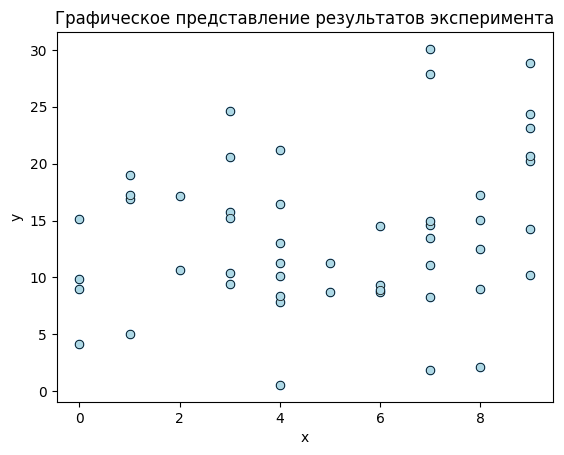

In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statistics as st
import scipy.stats as sc
from scipy.stats import chi2
import scipy.stats as sps
import scipy.optimize as spo



y = np.array( [2.17, 12.99, 12.51, 9.43, 9.36, 10.63, 15.14, 8.68, 5.05, 15.78,
    13.47, 27.91, 15.02, 10.36, 8.75, 21.16, 28.80, 24.63, 7.85, 20.56,
    9.86, 16.88, 4.15, 8.35, 24.33, 14.25, 10.15, 0.56, 23.16, 16.49,
    11.29, 8.99, 8.27, 10.20, 14.65, 30.08, 20.19, 1.83, 11.10, 19.00,
    15.21, 8.98, 14.54, 20.63, 17.27, 8.92, 17.26, 11.29, 14.95, 17.17
    ])

x = np.array( [8, 4, 8, 3, 6, 2, 0, 5, 1, 3,
    7, 7, 8, 3, 6, 4, 9, 3, 4, 3,
    0, 1, 0, 4, 9, 9, 4, 4, 9, 4,
    5, 8, 7, 9, 7, 7, 9, 7, 7, 1,
    3, 0, 6, 9, 8, 6, 1, 4, 7, 2
    ])


plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графическое представление результатов эксперимента")
plt.scatter(x, y, color='lightblue', edgecolors='black', linewidths=0.5)
plt.show()

МНК-оценки
$ \hat{\beta} = \left( \begin{array}{c} \hat\beta_0 \\ \hat\beta_1 \end{array} \right) = \left( \begin{array}{c} 11.106 \\ 0.538 \end{array} \right) $

In [81]:
Y_matrix = np.matrix(y).T
X_matrix = np.matrix([[1] * len(x), x])
Beta_matrix = np.linalg.inv(X_matrix * X_matrix.T) * X_matrix * Y_matrix
beta_0 = float(Beta_matrix[0, 0])
beta_1 = float(Beta_matrix[1, 0])
XX_T_inv = np.linalg.inv(X_matrix * X_matrix.T)
print("β0:", round(beta_0, 3) )
print("β1:", round(beta_1, 3))


β0: 11.106
β1: 0.538


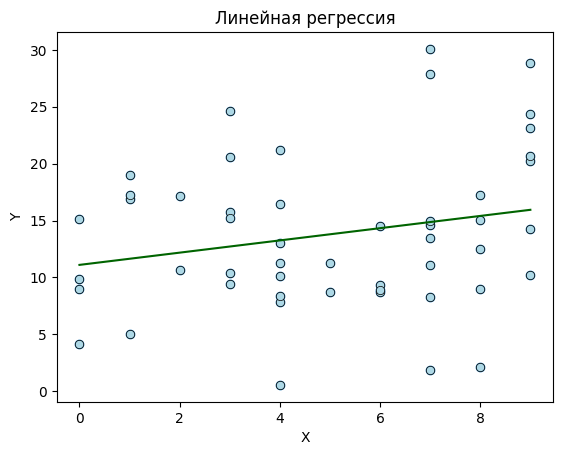

In [82]:
b = np.array([beta_0, beta_1])
plt.scatter(x, y)
plt.plot([min(x), max(x)], [beta_0 + beta_1 * min(x), beta_0 + beta_1 * max(x)], color='darkgreen')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Линейная регрессия")
plt.scatter(x, y, color='lightblue', edgecolors='black', linewidths=0.5)
plt.show()

При визуальном анализе данных можно заметить, что линия регрессии пересекает диапазон результатов эксперимента, и при этом её значение совпадает с средним значением результатов эксперимента при одинаковых значениях переменной X.

### 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h =  2.60 $. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha = 0.20$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещённая оценка дисперсии:

$ \displaystyle S^2 = \frac{RSS( \hat{\beta} )}{ n - r } = \frac{(Y - X^T \hat{\beta})^T (Y - X^T \hat{\beta})}{48} \approx 44.4$

Где r - ранг матрицы = 2

In [83]:
D = np.linalg.norm((Y_matrix - X_matrix.T * Beta_matrix).T*(Y_matrix - X_matrix.T * Beta_matrix)) /(len(x) - np.linalg.matrix_rank(X_matrix))
print("Ранг матрицы(r) =",np.linalg.matrix_rank(X_matrix))
print("Несмещённая оценка дисперсии =", D)

Ранг матрицы(r) = 2
Несмещённая оценка дисперсии = 44.4094537665651


Минимальная ошибка:  -13.237213130866385
Максимальная ошибка:  15.210442282176023


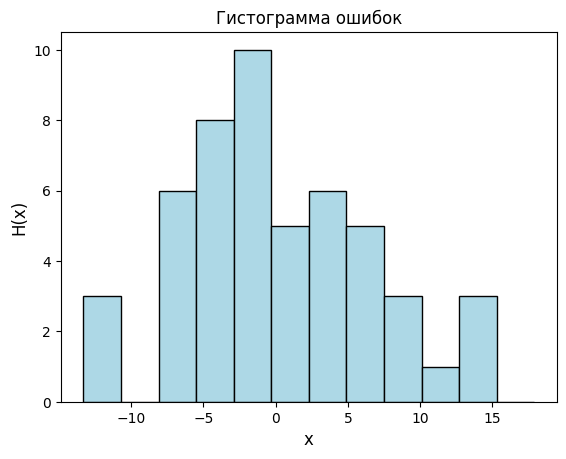

In [84]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
mean_mistakes = 0
std_mistakes = np.sqrt(D)
mistakes = Y_matrix - X_matrix.T * Beta_matrix
min_mistake_scalar = float(np.min(mistakes))
max_mistake_scalar = float(np.max(mistakes))
h = 2.6
plt.title("Гистограмма ошибок")
plt.xlabel('x', fontsize=12)
plt.ylabel('H(x)', fontsize=12)
min_mistake_scalar = float(np.min(mistakes))
max_mistake_scalar = float(np.max(mistakes))

print("Минимальная ошибка: ", min_mistake_scalar)

print("Максимальная ошибка: ",max_mistake_scalar)


counts, bins = np.histogram(mistakes, bins=[i / 100 for i in range((int(min_mistake_scalar)*100)-30, (int(max_mistake_scalar)*100)+300, int(h*100))])
plt.hist(bins[:-1], edgecolor='black', weights=counts, bins=bins, color='lightblue')
plt.show()

**Оценим соответствует ли распределение ошибок нормальному распредлению.**

При $ a_0 = 0 $ и $ \sigma^2 = 44.4$ и $ \alpha_1 = 0.2 $

$I_{1}=\left(-13.237,  -8.037 \right], n_{1}=3$ 

$P_{1}=0.09$  

$I_{2}=\left( -8.037,  -5.437\right], n_{2}= 6$ 

$P_{2}=0.093$   


$I_{3}=\left(-5.437,-2.837\right], n_{3}=8$  

$P_{3}=0.128$  


$I_{4}=\left(-2.837, -0.237\right], n_{4}=10$  

$P_{4}=0.15$  


$I_{5}=\left(-0.237, 2.363\right], n_{4}=5$  

$P_{5}=0.153$  


$I_{6}=\left(2.363, 4.963\right], n_{4}=6$  

$P_{6}=0.133$  


$I_{7}=\left(4.963, 7.563\right], n_{4}=5$  

$P_{7}=0.10$  


$I_{8}=\left(7.563, +\infty \right], n_{4}=7$  

$P_{8}=0.128$  








 **Вычисление статистики критерия $\chi^2$:**

   $\chi^2 = \sum \limits_{i=1}^7 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 3.13$

   **Сравнение с критическим значением:**
   - Из таблицы для распределения $\chi^2$ с 7 степенями свободы при уровне значимости $\alpha = 0.2$ значение критерия составляет $\chi_{7, 0.8}^2 \approx 9.803$.
   - Так как $\chi_{7, 0.8}^2 > \chi^2 $, Нет основания отвергнуть гипотезу.

   Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется $0.878$




In [85]:
from re import match
from math import inf

I = [  (-13.237, -8.037),
    (-8.037, -5.437),
    (-5.437, -2.837),
    (-2.837, -0.237),
    (-0.237, 2.363),
    (2.363, 4.963),
    (4.963, 7.563),
    (7.563, +inf)]

a0=0
sigma0= D
n=len(y)
alpha = 0.2
n_i = [3, 6, 8, 10, 5, 6, 5, 7];p_i = [];np_i = [];n_i_np_i = [];res = []
for i in I:
 p_i.append(round(sc.norm.cdf(i[1], loc=a0,scale=std_mistakes) - sc.norm.cdf(i[0], loc=a0,scale=std_mistakes), 7))
print(p_i)
for i in range (8):
 np_i.append(round(n*p_i[i],7))
for i in range(8):
 n_i_np_i.append(round(n_i[i] - np_i[i], 8))
for i in range(8):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 8))
print("χ2 = ", sum(res))
chi2_val_5_09 = chi2.ppf(1-alpha, 7)
print('χ_alpha =',round(chi2_val_5_09,3))
chi2 = 3.078
print("Наибольшее значение уровня значимости =", round(1 - sps.chi2.cdf(chi2, 7), 3))

[0.0904057, 0.0933829, 0.1278699, 0.1506582, 0.1527365, 0.133235, 0.1000042, 0.1282093]
χ2 =  3.13269608
χ_alpha = 9.803
Наибольшее значение уровня значимости = 0.878


In [86]:
Dn = sps.kstest([element[0,0] for element in mistakes], "norm", args = (mean_mistakes,std_mistakes)).statistic
print("Колмогоров:", Dn)
x_a = sps.ksone.ppf(1-alpha, 50)
print("x_alpha = ",x_a)


print("Наибольшее значение уровня значимости =", 1 - sps.ksone.cdf(Dn, 50))

Колмогоров: 0.10754427408257183
x_alpha =  0.12362978909230184
Наибольшее значение уровня значимости = 0.29341077555123674


Критерий Колмогорова\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq 0.108 \\ 1, \quad \widehat{D_n} > 0.108 \end{cases}$


Т.к. $\widehat{D_n} < x_\alpha$, гипотеза  принимается.

   Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется $0.293$

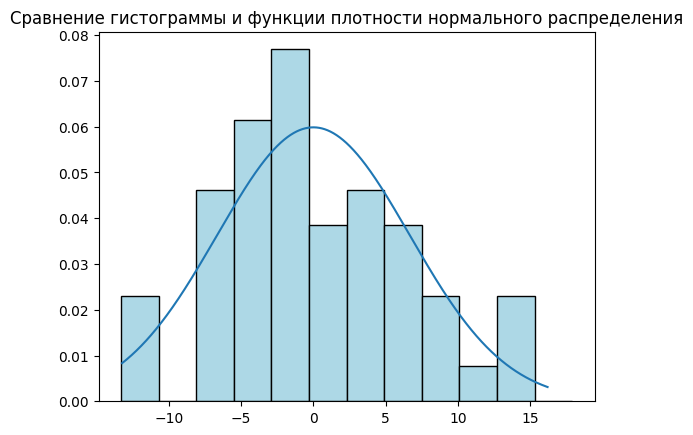

In [87]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
fig, ax = plt.subplots()
counts, bins = np.histogram(mistakes, bins=[i / 100 for i in range((int(min_mistake_scalar)*100)-30, (int(max_mistake_scalar)*100)+300, int(h*100))])
plt.hist(bins[:-1], edgecolor='black', weights=counts, bins=bins, color='lightblue', density= True)
mistakes_range = np.arange(min(mistakes), max(mistakes) + 1, 0.01)


plt.plot(mistakes_range, sps.norm.pdf(mistakes_range, mean_mistakes, std_mistakes))
ax.set_title("Сравнение гистограммы и функции плотности нормального распределения")
plt.show()

При рассмотрении построенного графика можно утверждать, что в общем случае расстояние между функциями распределения довольно невелико. Однако, следует отметить, что визуальная оценка может оказаться недостаточной для определения нормальности данных без дополнительного анализа.

### 3.В предположении нормальности ошибок построить доверительный интервал для параметров $\beta_0,\beta_1$ уровня доверия $1-\alpha$.Построить доверительный эллипс уровня доверия $1-\alpha$ для ($\beta_0,\beta_1$) (вычислить его полуоси).

ДНО функция: $\psi = C^T \beta $

Элемент дисперсии оценки: $ b_\psi = C^T (XX^T)^{-1}C$

Тогда: $ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

Доверительный интервал уровня доверия $1 - \alpha$:

$ P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $, 


$[ \widehat \psi -x_{\alpha}s\sqrt{b} , \widehat \psi + x_{\alpha}s\sqrt{b}] \ni \psi$ 

где квантиль $ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$x_{\alpha} = S_{n - 2}(1 - \frac{\alpha}{2}) = 1.2994$


- **Вычислим $\beta_0:$** 

  $\psi_{\beta_0} = \begin{pmatrix}
    1 \\
    0
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1
    \end{pmatrix}$

    $b_{\psi_{\beta_0}} =  \begin{pmatrix}
    1 & 0
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    1 \\ 0
    \end{pmatrix} = 0.082$

    
  
- **Вычислим $\beta_1:$**

  $\psi_{\beta_1} = \begin{pmatrix}
    0 \\
    1
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1
    \end{pmatrix}$
  
    $b_{\psi_{\beta_1}} =  \begin{pmatrix}
    0 & 1
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    0 \\ 1
    \end{pmatrix} = 0.0025$


$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_0}}}} \sim S_{n-2} $

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_1}}}} \sim S_{n-2} $




In [88]:
from scipy import stats
import scipy

r = np.linalg.matrix_rank(X_matrix)
n = len(x)
func = stats.t(n - 2)
x_alpha = func.ppf(1 - alpha/2)
print(f'x_alpha: {round(x_alpha, 4)}')
e =  np.array([1, 0]).reshape((2, 1))
e1 = np.array([1,0])
e2 = np.array([0,1])
e3 =  np.array([0, 1]).reshape((2, 1))


b1 = e1 * XX_T_inv * e
b2 = e2 *XX_T_inv*e3
print(b1)
print(b2)


left = beta_0 - x_alpha * np.sqrt(D) * np.sqrt(b1)
right = beta_0 + x_alpha * np.sqrt(D) * np.sqrt(b1)
print("Интервал для b1 (",left,right,")")

left = beta_1 - x_alpha * np.sqrt(D) * np.sqrt(b2)
right = beta_1 + x_alpha * np.sqrt(D) * np.sqrt(b2)
print("Интервал для b2 (",left,right,")")

x_alpha: 1.2994
[[0.08192049]]
[[0.00245712]]
Интервал для b1 ( [[8.62746462]] [[13.58447504]] )
Интервал для b2 ( [[0.10840864]] [[0.96690219]] )


**Построим доверительный эллипс для параметра $(\beta_0, \beta_1)$ уровня доверия 1 - $\alpha$** (вычислим полуоси)

$ A_\alpha = \{\overrightarrow{x}: (\overrightarrow{x} - \widehat \psi)^T B^{-1} (\overrightarrow{x} - \widehat \psi) \le qs^2x_\alpha\}$

$ A_\alpha = \{\overrightarrow{x}: (\overrightarrow{x} - \widehat \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\overrightarrow{x} - \widehat \psi) \le qs^2x_\alpha\}$, 

где $ x_\alpha  = 1 - \alpha$

$C = \begin{pmatrix}
    1 & 0\\
    0 & 1
\end{pmatrix} $

Пусть $ \begin{pmatrix}
    x\\
    y
\end{pmatrix}  = P(\widehat \psi - \psi)$, где P - матрица собственных векторов.

Тогда уравнение доверительного эллипсоида выглядит таким образом:

$(\widehat \psi -  \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\widehat \psi -  \psi) = \lambda_1 x^2 + \lambda_2 y^2 \le qs^2x_\alpha$, где $\lambda_1$ и $\lambda_2$ - собственные числа матрицы $XX^T$

$\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2 \le 1$


Большая полуось\
$ 3.5197$
\
Малая полуось\
$ 0.2945 $

In [89]:
XX_T = np.dot(X_matrix, X_matrix.T)
eigenvalues, eigenvectors = np.linalg.eig(XX_T)



func = stats.f(2, n - 2)
x_alpha = func.ppf(1 - alpha)
print(f'x_alpha: {round(x_alpha, 4)}')

a = np.sqrt((2 * D * x_alpha) / eigenvalues[0])
b =  np.sqrt((2 * D * x_alpha) / eigenvalues[1])

print(f'Большая полуось: {round(a, 4)}')
print(f'Малая полуось: {round(b, 4)}')


x_alpha: 1.6646
Большая полуось: 3.5197
Малая полуось: 0.2945


### 4.Сформулировать гипотезу независимой переменной Y от переменной X. Провести проверку зависимости.

Основная гипотеза: $H_0 : \psi = 0$

ДНО функция: 
$\psi = C^T \beta $

$ C = \begin{pmatrix}
    0 \\
    1
\end{pmatrix} \Rightarrow$, $\widehat \psi = \widehat \beta_1 $

$\mathbb{F} \approx 2.65$

$x_{\alpha} \approx 1.69$

$\mathbb{F} > x_{\alpha} \to$ Нет оснований принять гипотезу

In [90]:
c = np.array([0, 1])
b = np.dot(np.dot(c.T, XX_T_inv), c)
q = 1
r = 2
F = beta_1**2 / ( b*D)
print("Статистика F = " , F)

x_alpha = stats.f(q, 48).ppf(1 - alpha)
print("x_alpha = " , x_alpha)
F = 2.65
print("p =", round(1 - sps.f.cdf(F, 1, 48), 3))

Статистика F =  [[2.6491447]]
x_alpha =  1.6885413994027616
p = 0.11


### 5.Сформулировать модель включающую доплнительный член с $X^2$.Построить МНК оценки параметров $\beta_0,\beta_1,\beta_2$ в данной модели. Изобразить графически полученную регрессионную модель.



Линейная регрессионная модель:

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$

МНК-оценки параметров
$ \hat{\beta} = \left( \begin{array}{c} \hat\beta_0 \\ \hat\beta_1 \\ \hat\beta_2 \end{array} \right) = \left( \begin{array}{c} 13.249 \\ -0.898 \\ 0.152 \end{array} \right) $

In [91]:
Y_matrix = np.matrix(y).T
X_matrix = np.matrix([[1] * len(x), x, [i**2 for i in x]])
Beta_matrix = np.linalg.inv(X_matrix * X_matrix.T) * X_matrix * Y_matrix
beta_0 = float(Beta_matrix[0, 0])
beta_1 = float(Beta_matrix[1, 0])
beta_2 = float(Beta_matrix[2, 0])
XX_T_inv = np.linalg.inv(X_matrix * X_matrix.T)
print("β0:", round(beta_0, 3) )
print("β1:", round(beta_1, 3))
print("β2:", round(beta_2, 3))


β0: 13.249
β1: -0.898
β2: 0.152


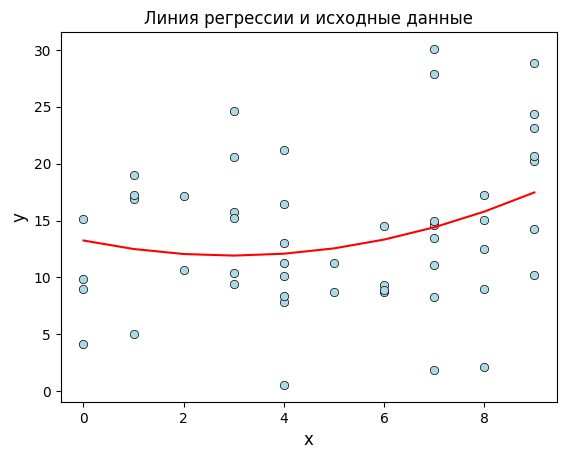

In [92]:
b = [beta_0, beta_1, beta_2]
plt.title('Линия регрессии и исходные данные')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.scatter(x, y, color='lightblue', edgecolors='black', linewidths=0.5)

X_val = np.array(sorted(x))
X = np.array([[1] * 50, X_val, X_val**2])

plt.plot(X_val, np.dot(np.transpose(X), b), 'r')
plt.show()

### 6.Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Несмещённая оценка дисперсии:

$ \displaystyle S^2 = \frac{RSS( \hat{\beta} )}{ n - r } = \frac{(Y - X^T \hat{\beta})^T (Y - X^T \hat{\beta})}{48} \approx 44.036$

r = 3

In [93]:
D = np.linalg.norm((Y_matrix - X_matrix.T * Beta_matrix).T*(Y_matrix - X_matrix.T * Beta_matrix)) /(len(x) - np.linalg.matrix_rank(X_matrix))
print("r =",np.linalg.matrix_rank(X_matrix))
print("Несмещённая оценка дисперсии =", D)

r = 3
Несмещённая оценка дисперсии = 44.03615252733759


[[-13.61613321]] [[15.67452754]]


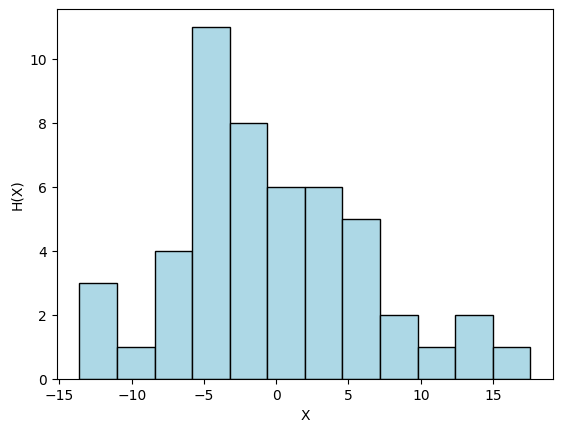

In [94]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
mean_mistakes = 0
std_mistakes = np.sqrt(D)
mistakes = Y_matrix - X_matrix.T * Beta_matrix

plt.hist(mistakes, bins=np.arange(min(mistakes), max(mistakes) + h, h), edgecolor='black',color = "lightblue")
print(min(mistakes), max(mistakes))
plt.xlabel('X')
plt.ylabel('H(X)')
plt.show()



При $ a_0 = 0 $ и $ \sigma^2 = 44.04$ и $ \alpha_1 = 0.2 $

$I_{1}=\left(-13.61,  -8.41 \right], n_{1}= 4$ 

$P_{1}=0.082$  

$I_{2}=\left( -8.41,  -5.81\right], n_{2}= 4$ 

$P_{2}=0.09$   


$I_{3}=\left(-5.81,-3.21\right], n_{3}=11$  

$P_{3}=0.124$  


$I_{4}=\left(-3.21, -0.61\right], n_{4}=8$  

$P_{4}=0.15$  


$I_{5}=\left(-0.61, 1.99\right], n_{4}=6$  

$P_{5}=0.154$  


$I_{6}=\left(1.99, 4.59\right], n_{4}=6$  

$P_{6}=0.138$  


$I_{7}=\left(4.59, 7.19\right], n_{4}=5$  

$P_{7}=0.105$  


$I_{8}=\left(7.19, +\infty \right], n_{4}=6$  

$P_{8}=0.139$  








 **Вычисление статистики критерия $\chi^2$:**

   $\chi^2 = \sum \limits_{i=1}^7 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 4.479$

   **Сравнение с критическим значением:**
   - Из таблицы для распределения $\chi^2$ с 7 степенями свободы при уровне значимости $\alpha = 0.2$ значение критерия составляет $\chi_{7, 0.8}^2 \approx 9.803$.
   - Так как $\chi_{7, 0.8}^2 > \chi^2 $, Нет основания отвергнуть гипотезу.

   Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется $0.81$

In [95]:
from re import match
from math import inf
from scipy.stats import chi2
I = [
    (-13.61, -8.41),
    (-8.41, -5.81),
    (-5.81, -3.21),
    (-3.21, -0.61),
    (-0.61, 1.99),
    (1.99, 4.59),
    (4.59, 7.19),
    (7.19, float('inf'))
]
a0=0
sigma0= D
n=len(y)

alpha = 0.2
n_i = [4, 4, 11, 8, 6, 6, 5, 6];p_i = [];np_i = [];n_i_np_i = [];res = []
for i in I:
 p_i.append(round(sc.norm.cdf(i[1], loc=a0,scale=sigma0**0.5) - sc.norm.cdf(i[0], loc=a0,scale=sigma0**0.5), 7))
print(p_i)
for i in range (8):
 np_i.append(round(n*p_i[i],7))
for i in range(8):
 n_i_np_i.append(round(n_i[i] - np_i[i], 7))
for i in range(8):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 7))
print("χ2 = ", sum(res))
chi2_val_5_09 = chi2.ppf(1-alpha, 7)
print('χ_alpha =',round(chi2_val_5_09,3))
chi2 = 3.73
print("Наибольшее значение уровня значимости =", round(1 - sps.chi2.cdf(chi2, 7), 3))

[0.0823815, 0.0881247, 0.1236472, 0.1490897, 0.1544864, 0.1375663, 0.1052719, 0.1392959]
χ2 =  4.4789174
χ_alpha = 9.803
Наибольшее значение уровня значимости = 0.81


In [96]:
Dn = sps.kstest([element[0,0] for element in mistakes], "norm", args = (mean_mistakes,std_mistakes)).statistic
print("Колмогоров: ", Dn)
x_a = sps.ksone.ppf(1-alpha, 50)
print(x_a)
print("Наибольшее значение уровня значимости =", 1 - sps.ksone.cdf(Dn, 50))

Колмогоров:  0.08595637222796693
0.12362978909230184
Наибольшее значение уровня значимости = 0.45200106631498416


Критерий Колмогорова\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq 0.123 \\ 1, \quad \widehat{D_n} > 0.123 \end{cases}$


Т.к. $\widehat{D_n} < x_\alpha$, Нет основания отвергнуть гипотезу.

   Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется $0.452$

[[-13.61613321]] [[15.67452754]]


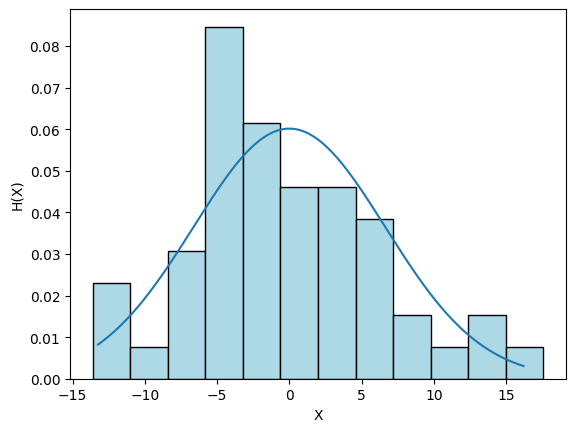

In [97]:

plt.plot(mistakes_range, sps.norm.pdf(mistakes_range, mean_mistakes, std_mistakes))
plt.hist(mistakes, bins=np.arange(min(mistakes), max(mistakes) + h, h), edgecolor='black',color = "lightblue",density= True)
print(min(mistakes), max(mistakes))
plt.xlabel('X')
plt.ylabel('H(X)')
plt.show()

### 7.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0,\beta_1,\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

In [98]:
x_alpha = stats.t(n - 3).ppf(1 - alpha / 2)
print(f'x_alpha: {round(x_alpha, 4)}')


e0 = np.array([1, 0, 0])
e0_1 = np.array([[1], [0], [0]])
e1 = np.array([0, 1, 0])
e1_1 = np.array([[0], [1], [0]])
e2 = np.array([0, 0, 1])
e2_1 = np.array([[0], [0], [1]])

b1 = e0*XX_T_inv*e0_1
b2 = e1*XX_T_inv*e1_1
b3 = e2*XX_T_inv*e2_1
print("b1 = ", b1)
print("b2 = ", b2)
print("b3 = ", b3)
left = beta_0 - x_alpha * np.sqrt(D) * np.sqrt(b1)
right = beta_0 + x_alpha * np.sqrt(D) * np.sqrt(b1)
print("Интервал для b0 (",left,right,")")

left = beta_1 - x_alpha * np.sqrt(D) * np.sqrt(b2)
right = beta_1 + x_alpha * np.sqrt(D) * np.sqrt(b2)
print("Интервал для b1 (",left,right,")")

left = beta_2 - x_alpha * np.sqrt(D) * np.sqrt(b3)
right = beta_2 + x_alpha * np.sqrt(D) * np.sqrt(b3)
print("Интервал для b2 (",left,right,")")



x_alpha: 1.2998
b1 =  [[0.15608182]]
b2 =  [[0.0357454]]
b3 =  [[0.00037262]]
Интервал для b0 ( [[9.84174596]] [[16.65721428]] )
Интервал для b1 ( [[-2.52923338]] [[0.73235869]] )
Интервал для b2 ( [[-0.01456406]] [[0.3184438]] )


ДНО функция: $\psi = C^T \beta $

Элемент дисперсии оценки: $ b_\psi = C^T (XX^T)^{-1}C$

Тогда: $ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

Доверительный интервал уровня доверия $1 - \alpha$:

$ P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $


$[ \widehat \psi -x_{\alpha}s\sqrt{b} , \widehat \psi + x_{\alpha}s\sqrt{b}] \ni \psi$ 

где квантиль $ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$x_{\alpha} = S_{n - 3}(1 - \frac{\alpha}{2}) = 1.2998$

- **Вычислим $\beta_0:$**

  $\psi_{\beta_0} = \begin{pmatrix}
    1 \\
    0 \\
    0
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2
    \end{pmatrix}$

    $b_{\psi_{\beta_0}} =  \begin{pmatrix}
    1 & 0 & 0
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    1 \\ 0 \\ 0
    \end{pmatrix} = 0.156$

    
  
- **Вычислим $\beta_1:$**

  $\psi_{\beta_1} = \begin{pmatrix}
    0 \\
    1 \\
    0
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2
    \end{pmatrix}$
  
    $b_{\psi_{\beta_1}} =  \begin{pmatrix}
    0 & 1 & 0
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    0 \\ 1 \\ 0
    \end{pmatrix} = 0.0357$

- **Вычислим $\beta_2:$**

  $\psi_{\beta_2} = \begin{pmatrix}
    0 \\
    0 \\
    1
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2
    \end{pmatrix}$
  
    $b_{\psi_{\beta_2}} =  \begin{pmatrix}
    0 & 0 & 1
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    0 \\ 0 \\ 1
    \end{pmatrix} = 0.00037$

    
$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_0}}}} \sim S_{n-3} $

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_1}}}} \sim S_{n-3} $

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_2}}}} \sim S_{n-3} $




**Построим доверительный эллипс для параметра $(\beta_0, \beta_1)$ уровня доверия 1 - $\alpha$ (найдём полуоси)**

$ A_\alpha = \{\overrightarrow{x}: (\overrightarrow{x} - \widehat \psi)^T B^{-1} (\overrightarrow{x} - \widehat \psi) \le qs^2x_\alpha\}$

$ A_\alpha = \{\overrightarrow{x}: (\overrightarrow{x} - \widehat \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\overrightarrow{x} - \widehat \psi) \le qs^2x_\alpha\}$, 

где $ x_\alpha = F_{q, n-r}(x_\alpha) = 1 - \alpha$

$C = \begin{pmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{pmatrix} $

Пусть $ \begin{pmatrix}
    x\\
    y
\end{pmatrix}  = P(\widehat \psi - \psi)$, где P - матрица собственных векторов.

Тогда уравнение доверительного эллипсоида выглядит таким образом:

$(\widehat \psi -  \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\widehat \psi -  \psi) = \lambda_1 x^2 + \lambda_2 y^2 + \lambda_2 z^2 \le qs^2x_\alpha$, где $\lambda_1$, $\lambda_2$ и $\lambda_3$ - собственные числа матрицы $XX^T$

$\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2  + \cfrac{\lambda_2}{qs^2x_\alpha}z^2\le 1$

**Уравнение Элипса:**

$349.03x^2 + 0.058y^2 + 0.6192z^2 < 1$ 

In [99]:
XX_T = np.dot(X_matrix, X_matrix.T)
eigenvalues, eigenvectors = np.linalg.eig(XX_T)
beta = [beta_0, beta_1, beta_2]


x_alpha = stats.f(3, n - 2).ppf(1 - alpha)
print(f'x_alpha: {round(x_alpha, 4)}')

a = np.sqrt((2 * D * x_alpha) / eigenvalues[0])
b =  np.sqrt((2 * D * x_alpha) / eigenvalues[1])

print(f'Большая полуось: {round(b, 4)}')
print(f'Малая полуось: {round(a, 4)}')



    


x_alpha: 1.6072
Большая полуось: 5.0831
Малая полуось: 0.0384


Большая полуось: 5.0831

Малая полуось: 0.0384

### 8.Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

Основная гипотеза: $H_0 : \psi = 0$

ДНО - функция: 
$\psi = C^T \beta $

$ C = \begin{pmatrix}
    0 \\
    0 \\
    1
\end{pmatrix} \Rightarrow$, $\widehat \psi = \widehat \beta_2 $

$\mathbb{F} \approx 1.407$

$x_{\alpha} \approx 1.69$

$\mathbb{F} < x_{\alpha_2} \to$ Нет основания отвергнуть гипотезу.

In [100]:
c = np.array([0, 0, 1])
b = np.dot(np.dot(c.T, XX_T_inv), c)

q = 1
r = 3
F = beta_2 ** 2 / (b * q * D)
print("Статистика F = " , F)

x_alpha = stats.f(q, 47).ppf(1 - alpha)
print("x_alpha = " , x_alpha)

F = 1.11
print("p_value", round(1 - sps.f.cdf(F, 1, 47), 3))

Статистика F =  [[1.40690338]]
x_alpha =  1.6895448936537667
p_value 0.297


## Выводы
В рамках выполнения практической работы была создана модель линейной регрессии для анализа взаимосвязи переменной Y от X. Метод наименьших квадратов (МНК) использовался для определения параметров модели. Дополнительно были вычислены несмещенные оценки дисперсии, проведена проверка гипотезы о нормальности ошибок с уровнем значимости $\alpha$ с использованием критерия $\chi^2$, а также оценено расстояние до нормального распределения по методу Колмогорова. Работа также включает в себя приобретение навыков построения МНК оценок, доверительных эллипсов и эллипсоидов, а также проверки гипотез о независимости и наличии линейной регрессионной зависимости.